In [5]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 

# Datasets 

In [7]:
atp_matches2022 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv' # 2022 match data
atp_matches2023 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv' # 2023 match data
atp_matches2024 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2024.csv' # 2024 match data
# convert each csv file into data frames
df_matches2022 = pd.read_csv(atp_matches2022)
df_matches2023 = pd.read_csv(atp_matches2023)
df_matches2024 = pd.read_csv(atp_matches2024)


In [7]:
atp_rankings_current = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_current.csv'
rankings_current_df = pd.read_csv(atp_rankings_current)

rankings_current_df.shape

(35031, 4)

In [9]:
rankings_current_df.dtypes

ranking_date    int64
rank            int64
player          int64
points          int64
dtype: object

In [11]:
rankings_current_df.info()#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35031 entries, 0 to 35030
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ranking_date  35031 non-null  int64
 1   rank          35031 non-null  int64
 2   player        35031 non-null  int64
 3   points        35031 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [75]:
rankings_current_df['ranking_date'] = pd.to_datetime(rankings_current_df['ranking_date'], format='%Y%m%d')
print(rankings_current_df.dtypes)

ranking_date    datetime64[ns]
rank                     int64
player                   int64
points                   int64
dtype: object


In [77]:
rankings_current_df['ranking_date'] 

0       2024-01-01
1       2024-01-01
2       2024-01-01
3       2024-01-01
4       2024-01-01
           ...    
35026   2024-05-27
35027   2024-05-27
35028   2024-05-27
35029   2024-05-27
35030   2024-05-27
Name: ranking_date, Length: 35031, dtype: datetime64[ns]

In [79]:
# Identify duplicate rows
print("Number of duplicate rows:", rankings_current_df.duplicated().sum())

# Drop duplicates and keep only the first occurrence
# Reset the index to ensure consistency after combining data
rankings_current_df_without_duplicates = rankings_current_df.drop_duplicates(keep='first').reset_index(drop=True)

print("Number of duplicate rows after handling:", rankings_current_df.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after handling: 0


In [81]:
rankings_current_df.to_csv('atp_rankings_current_cleaned.csv',index=False) 

In [5]:
#atp_players = 'https://github.com/JeffSackmann/tennis_atp/blob/master/atp_players.csv'
atp_players = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_players.csv'
players_df = pd.read_csv(atp_players)

In [7]:
players_df.shape

(65019, 8)

In [9]:
players_df.dtypes

player_id        int64
name_first      object
name_last       object
hand            object
dob            float64
ioc             object
height         float64
wikidata_id     object
dtype: object

In [11]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65019 entries, 0 to 65018
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    65019 non-null  int64  
 1   name_first   64134 non-null  object 
 2   name_last    64971 non-null  object 
 3   hand         65002 non-null  object 
 4   dob          46447 non-null  float64
 5   ioc          64343 non-null  object 
 6   height       2819 non-null   float64
 7   wikidata_id  4894 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB


In [14]:
import pandas as pd
# data type Conversion into date 
players_df['dob'] = pd.to_datetime(players_df['dob'], format='%Y%m%d', errors='coerce')
print(players_df['dob'].dtypes)

datetime64[ns]


In [16]:
players_df.dtypes

player_id               int64
name_first             object
name_last              object
hand                   object
dob            datetime64[ns]
ioc                    object
height                float64
wikidata_id            object
dtype: object

In [19]:
# Create a new column 'name_full' by concatenating 'name_first' and 'name_last'
players_df['name_full'] = players_df['name_first'] + ' ' + players_df['name_last']

# Print the dataframe to check the new column
print(players_df)

       player_id  name_first      name_last hand        dob  ioc  height  \
0         100001     Gardnar         Mulloy    R 1913-11-22  USA   185.0   
1         100002      Pancho         Segura    R 1921-06-20  ECU   168.0   
2         100003       Frank        Sedgman    R 1927-10-02  AUS   180.0   
3         100004    Giuseppe          Merlo    R 1927-10-11  ITA     NaN   
4         100005     Richard       Gonzalez    R 1928-05-09  USA   188.0   
...          ...         ...            ...  ...        ...  ...     ...   
65014     212913      Pietro          Ricci    U        NaT  ITA     NaN   
65015     212914       Corey          Craig    U        NaT  USA     NaN   
65016     212915  Aleksandar     Ljubojevic    U        NaT  SRB     NaN   
65017     212916       Marko  Milosavljevic    U        NaT  SRB     NaN   
65018     212917      Stefan       Skobelev    U        NaT  SRB     NaN   

      wikidata_id              name_full  
0          Q54544         Gardnar Mulloy  
1

In [21]:
players_df.to_csv('atp_players_concatenated.csv',index=False) 

In [24]:
# Drop the 'name_first' and 'name_last' columns
players_df = players_df.drop(['name_first', 'name_last'], axis=1)

# Reorder the columns so that 'name_full' is after 'player_id'
cols = list(players_df.columns)
cols.insert(cols.index('player_id') + 1, cols.pop(cols.index('name_full')))
players_df = players_df.loc[:, cols]

# Print the dataframe to check the changes
print(players_df)

       player_id              name_full hand        dob  ioc  height  \
0         100001         Gardnar Mulloy    R 1913-11-22  USA   185.0   
1         100002          Pancho Segura    R 1921-06-20  ECU   168.0   
2         100003          Frank Sedgman    R 1927-10-02  AUS   180.0   
3         100004         Giuseppe Merlo    R 1927-10-11  ITA     NaN   
4         100005       Richard Gonzalez    R 1928-05-09  USA   188.0   
...          ...                    ...  ...        ...  ...     ...   
65014     212913           Pietro Ricci    U        NaT  ITA     NaN   
65015     212914            Corey Craig    U        NaT  USA     NaN   
65016     212915  Aleksandar Ljubojevic    U        NaT  SRB     NaN   
65017     212916    Marko Milosavljevic    U        NaT  SRB     NaN   
65018     212917        Stefan Skobelev    U        NaT  SRB     NaN   

      wikidata_id  
0          Q54544  
1          Q54581  
2         Q962049  
3        Q1258752  
4          Q53554  
...           .

In [30]:
# Drop columns with null values
players_df = players_df.dropna(subset=['name_full', 'dob', 'height', 'hand', 'ioc', 'wikidata_id'])
# Print the dataframe to check the changes
print(players_df)

       player_id         name_full hand        dob  ioc  height wikidata_id
0         100001    Gardnar Mulloy    R 1913-11-22  USA   185.0      Q54544
1         100002     Pancho Segura    R 1921-06-20  ECU   168.0      Q54581
2         100003     Frank Sedgman    R 1927-10-02  AUS   180.0     Q962049
4         100005  Richard Gonzalez    R 1928-05-09  USA   188.0      Q53554
5         100006      Grant Golden    R 1929-08-21  USA   175.0    Q3115390
...          ...               ...  ...        ...  ...     ...         ...
62006     209903    Lukas Neumayer    R 2002-09-06  AUT   183.0  Q107641373
62019     209916        Marko Topo    R 2003-09-13  SRB   188.0  Q106949539
62021     209918         Hanwen Li    R 2002-08-22  CHN   180.0  Q106860558
62053     209950       Arthur Fils    R 2004-06-12  FRA   185.0  Q107207693
62116     210013    Martin Damm Sr    R 1972-08-01  CZE   188.0     Q381173

[2438 rows x 7 columns]


In [32]:
players_df.to_csv('atp_players_concat_cleaned.csv',index=False) 

# This final dataframe combines 2022, 2023 and 2024.

In [9]:
atp_combined_df = pd.concat([df_matches2022, df_matches2023, df_matches2024], ignore_index=True)
atp_combined_df.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NaN,NaN,...,50.0,32.0,7.0,10.0,3.0,5.0,11.0,3308.0,19.0,2260.0
1,2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NaN,NaN,...,33.0,21.0,8.0,9.0,3.0,6.0,14.0,2475.0,20.0,2230.0
2,2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NaN,NaN,...,80.0,62.0,20.0,16.0,6.0,7.0,19.0,2260.0,9.0,3706.0
3,2022-8888,Atp Cup,Hard,16,A,20220103,297,105807,NaN,NaN,...,27.0,17.0,1.0,7.0,4.0,8.0,20.0,2230.0,860.0,18.0
4,2022-8888,Atp Cup,Hard,16,A,20220103,296,106421,NaN,NaN,...,35.0,22.0,4.0,8.0,3.0,7.0,2.0,8640.0,11.0,3308.0
5,2022-8888,Atp Cup,Hard,16,A,20220103,295,133430,NaN,NaN,...,61.0,45.0,21.0,16.0,7.0,9.0,14.0,2475.0,167.0,409.0
6,2022-8888,Atp Cup,Hard,16,A,20220103,294,134770,NaN,NaN,...,38.0,24.0,9.0,10.0,3.0,7.0,8.0,4160.0,33.0,1591.0
7,2022-8888,Atp Cup,Hard,16,A,20220103,293,105936,NaN,NaN,...,38.0,27.0,10.0,10.0,7.0,11.0,42.0,1402.0,345.0,137.0
8,2022-8888,Atp Cup,Hard,16,A,20220103,292,106426,NaN,NaN,...,51.0,29.0,13.0,12.0,8.0,14.0,17.0,2353.0,33.0,1591.0
9,2022-8888,Atp Cup,Hard,16,A,20220103,291,105936,NaN,NaN,...,65.0,42.0,19.0,16.0,1.0,5.0,42.0,1402.0,139.0,505.0


# How many rows and columns does the combined dataset have ?

In [11]:
atp_combined_df.shape

(7320, 49)

# Get the data types of all columns of the dataframe.

In [13]:
atp_combined_df.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed            object
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed             object
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

# Count the number of non null values for each column. 

In [15]:
atp_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          7320 non-null   object 
 1   tourney_name        7320 non-null   object 
 2   surface             7267 non-null   object 
 3   draw_size           7320 non-null   int64  
 4   tourney_level       7320 non-null   object 
 5   tourney_date        7320 non-null   int64  
 6   match_num           7320 non-null   int64  
 7   winner_id           7320 non-null   int64  
 8   winner_seed         3088 non-null   object 
 9   winner_entry        1101 non-null   object 
 10  winner_name         7320 non-null   object 
 11  winner_hand         7320 non-null   object 
 12  winner_ht           7039 non-null   float64
 13  winner_ioc          7320 non-null   object 
 14  winner_age          7316 non-null   float64
 15  loser_id            7320 non-null   int64  
 16  loser_

# Converting the integer to datetime format.  

In [17]:
atp_combined_df['tourney_date'] = pd.to_datetime(atp_combined_df['tourney_date'], format='%Y%m%d')
print(atp_combined_df.dtypes)

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                      int64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                      int64
winner_id                      int64
winner_seed                   object
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
loser_id                       int64
loser_seed                    object
loser_entry                   object
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
score                         object
best_of                        int64
round                         object
minutes                      float64
w

# displaying the date column with the right format YYYY-mm-dd

In [19]:
atp_combined_df['tourney_date'] 

0      2022-01-03
1      2022-01-03
2      2022-01-03
3      2022-01-03
4      2022-01-03
          ...    
7315   2024-02-03
7316   2024-02-02
7317   2024-02-02
7318   2024-02-02
7319   2024-02-02
Name: tourney_date, Length: 7320, dtype: datetime64[ns]

# Dealing with duplicates

In [21]:
# Identify duplicate rows
print("Number of duplicate rows:", atp_combined_df.duplicated().sum())

# Drop duplicates and keep only the first occurrence
# Reset the index to ensure consistency after combining data
atp_combined_df_no_duplicates = atp_combined_df.drop_duplicates(keep='first').reset_index(drop=True)

print("Number of duplicate rows after handling:", atp_combined_df.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after handling: 0


# Columns to drop. Get rid of unnecessary columns for analysis.

In [23]:
columns_to_drop = ['tourney_id', 'draw_size', 'winner_seed', 'winner_entry', 'loser_seed', 'loser_entry', 'tourney_name', 'tourney_date', 'match_num']
atp_combined_df = atp_combined_df.drop(columns=columns_to_drop)

In [25]:
atp_combined_df.shape

(7320, 40)

# Filling null values with a specific value.

In [27]:
# Find the most frequent value in the 'surface' and loser_hand columns
most_frequent_surface = (atp_combined_df['surface'].mode().iloc[0])
most_frequent_loser_hand = (atp_combined_df['loser_hand'].mode().iloc[0])

# Replace missing values with the most frequent values
atp_combined_df['surface'] = atp_combined_df['surface'].fillna(most_frequent_surface)
atp_combined_df['loser_hand'] = atp_combined_df['loser_hand'].fillna(most_frequent_loser_hand)   

In [29]:
# Replace missing values with the mean of the column.
num_variables=['winner_ht','winner_age','loser_ht','loser_age','minutes','w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced','winner_rank','winner_rank_points','loser_rank','loser_rank_points']      
for column in num_variables:
    atp_combined_df[num_variables] = atp_combined_df[num_variables].fillna(atp_combined_df[num_variables].mean()) 

In [31]:
#identifying missing values
atp_combined_df.isnull().sum()

surface               0
tourney_level         0
winner_id             0
winner_name           0
winner_hand           0
winner_ht             0
winner_ioc            0
winner_age            0
loser_id              0
loser_name            0
loser_hand            0
loser_ht              0
loser_ioc             0
loser_age             0
score                 0
best_of               0
round                 0
minutes               0
w_ace                 0
w_df                  0
w_svpt                0
w_1stIn               0
w_1stWon              0
w_2ndWon              0
w_SvGms               0
w_bpSaved             0
w_bpFaced             0
l_ace                 0
l_df                  0
l_svpt                0
l_1stIn               0
l_1stWon              0
l_2ndWon              0
l_SvGms               0
l_bpSaved             0
l_bpFaced             0
winner_rank           0
winner_rank_points    0
loser_rank            0
loser_rank_points     0
dtype: int64

In [33]:
atp_combined_df.shape

(7320, 40)

In [35]:
atp_combined_df.to_csv('atp_matches_combined_cleaned.csv',index=False) 

# EDA: Analyzing categorical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Min and Max age of the winners
min_age = atp_combined_df['winner_age'].min()
max_age = atp_combined_df['winner_age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

In [ ]:
#Calculate descriptive statistics
print(atp_combined_df.describe())

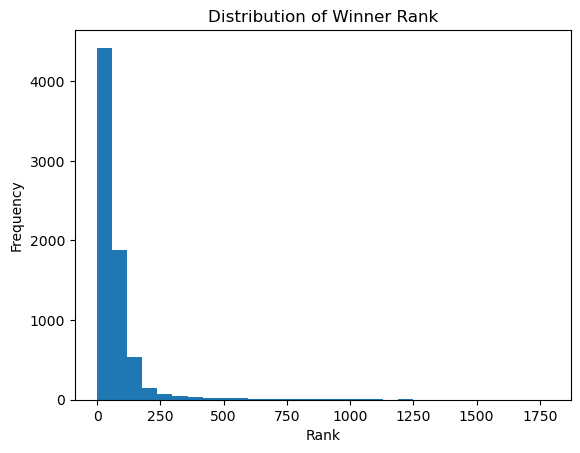

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create histogram of winner rank
plt.hist(atp_combined_df['winner_rank'], bins=30)
plt.title('Distribution of Winner Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

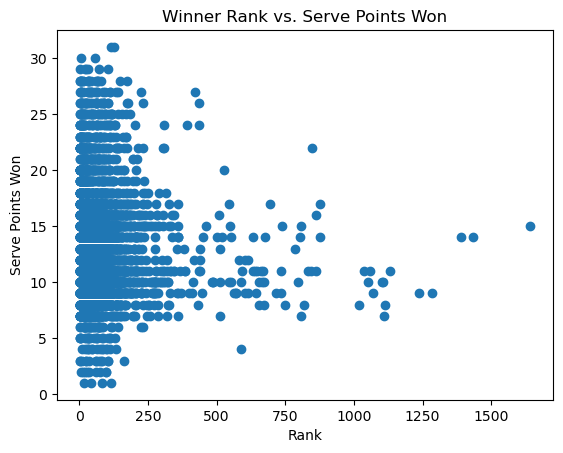

In [55]:
# Create scatter plot of winner rank vs. winner serve points won
plt.scatter(atp_combined_df['winner_rank'], atp_combined_df['w_SvGms'])
plt.title('Winner Rank vs. Serve Points Won')
plt.xlabel('Rank')
plt.ylabel('Serve Points Won')
plt.show()

# The players with the best ranking have more winning service points. 

[Text(0.5, 0, 'Surface'), Text(0, 0.5, 'Aces')]

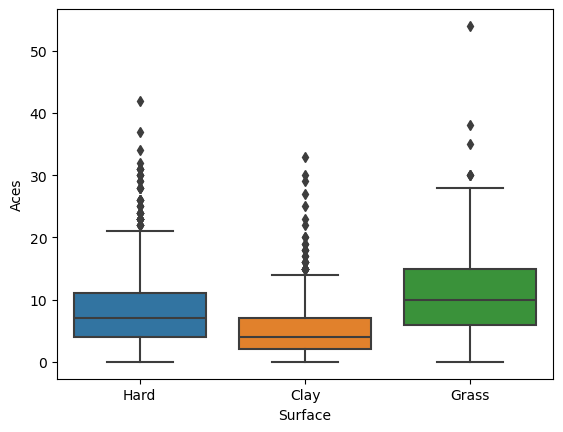

In [31]:
# Distribution of aces by surface type
How different court surfaces affect serving performance in high-level tennis tournaments, 
highlighting the relationship between court characteristics and the effectiveness of serves. 

import seaborn as sns
atp_combined_df_h = atp_combined_df[atp_combined_df['tourney_level'].astype(str).isin(['G','M'])].copy()
atp_combined_df_h['w_ace'] = atp_combined_df_h['w_ace'].astype(float)
g = sns.boxplot(x="surface", y="w_ace", data=atp_combined_df_h)
g.set(xlabel='Surface', ylabel='Aces')

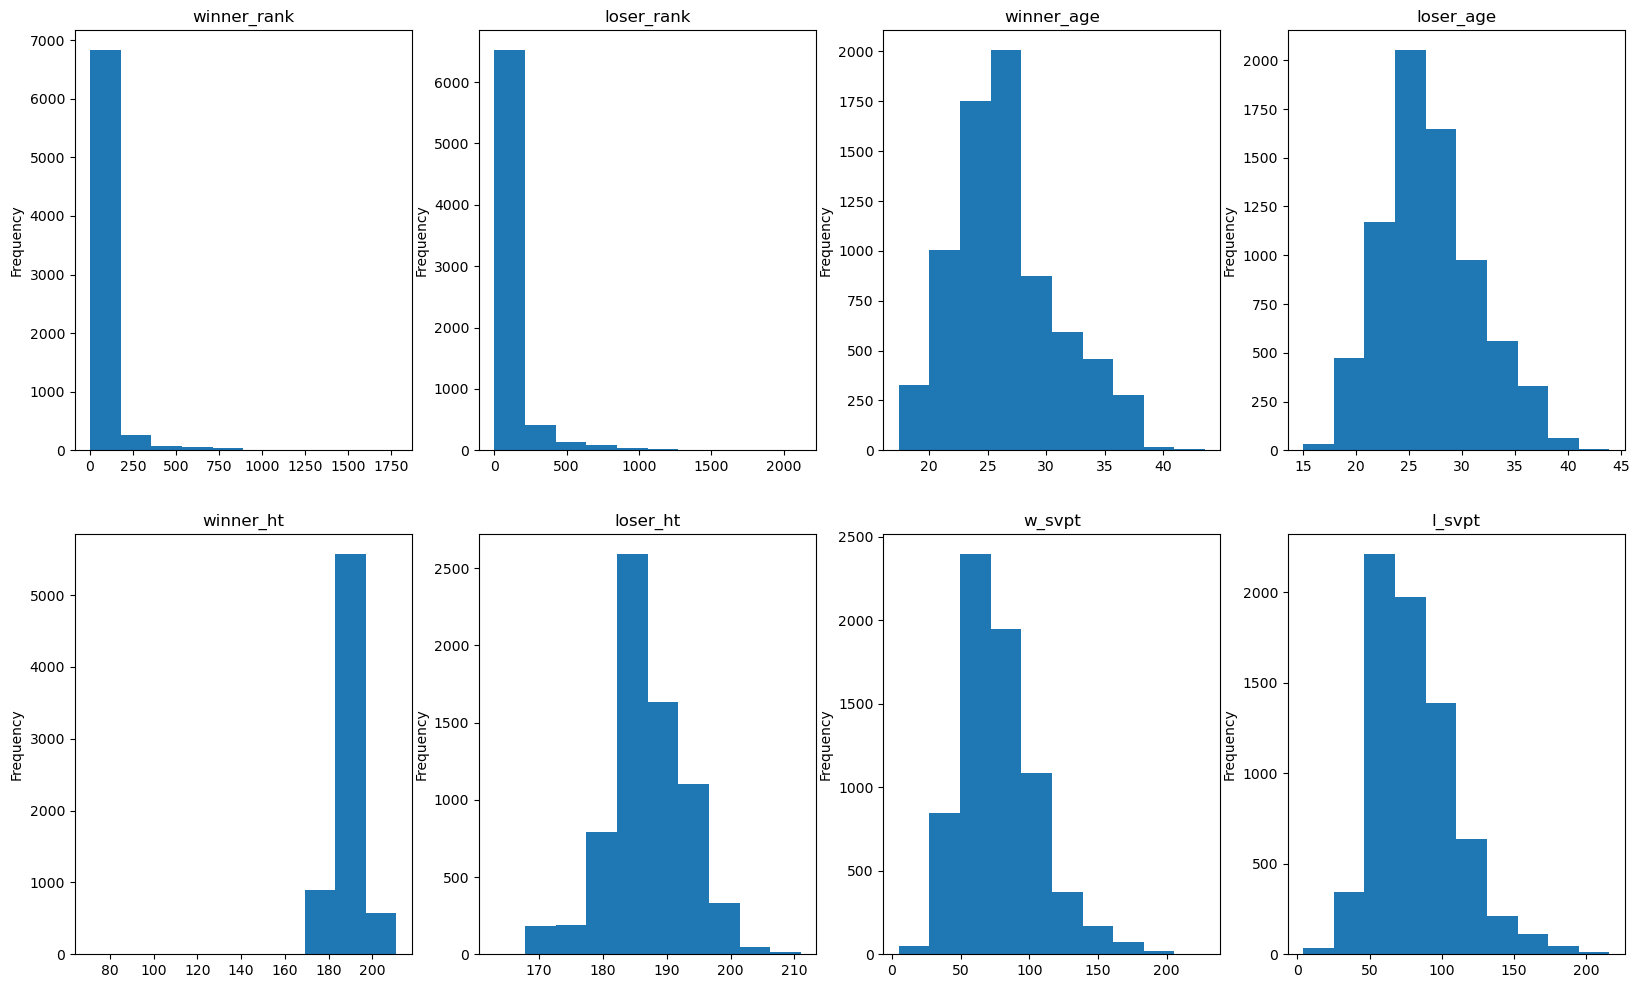

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

#columns choosen
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht','w_svpt','l_svpt']

plt.figure(1, figsize=(20,12))

for i in range(1,9):
    plt.subplot(2,4,i)
    atp_combined_df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])


# Key Performance Indicators (KPIs):

In [ ]:
# Calculate serve percentage for winner
atp_combined_df['w_serve_pct'] = atp_combined_df['w_1stWon'] / atp_combined_df['w_svpt']

# Calculate return percentage for winner
atp_combined_df['w_return_pct'] = (atp_combined_df['w_1stWon'] + atp_combined_df['w_2ndWon']) / (atp_combined_df['w_svpt'] + atp_combined_df['w_df'])

# Calculate serve percentage for loser
atp_combined_df['l_serve_pct'] = atp_combined_df['l_1stWon'] / atp_combined_df['l_svpt']

# Calculate return percentage for loser
atp_combined_df['l_return_pct'] = (atp_combined_df['l_1stWon'] + atp_combined_df['l_2ndWon']) / (atp_combined_df['l_svpt'] + atp_combined_df['l_df'])

# Calculate difference in serve percentage and return percentage between winner and loser
atp_combined_df['serve_pct_diff'] = atp_combined_df['w_serve_pct'] - atp_combined_df['l_serve_pct']
atp_combined_df['return_pct_diff'] = atp_combined_df['w_return_pct'] - atp_combined_df['l_return_pct']['w_serve_pct'] = atp_combined_df['w_1stWon'] / atp_combined_df['w_svpt']

# Calculate return percentage for winner
atp_combined_df['w_return_pct'] = (atp_combined_df['w_1stWon'] + atp_combined_df['w_2ndWon']) / (atp_combined_df['w_svpt'] + atp_combined_df['w_df'])

# Calculate serve percentage for loser
atp_combined_df['l_serve_pct'] = atp_combined_df['l_1stWon'] / atp_combined_df['l_svpt']

# Calculate return percentage for loser
atp_combined_df['l_return_pct'] = (atp_combined_df['l_1stWon'] + atp_combined_df['l_2ndWon']) / (atp_combined_df['l_svpt'] + atp_combined_df['l_df'])

# Calculate difference in serve percentage and return percentage between winner and loser
atp_combined_df['serve_pct_diff'] = atp_combined_df['w_serve_pct'] - atp_combined_df['l_serve_pct']
atp_combined_df['return_pct_diff'] = atp_combined_df['w_return_pct'] - atp_combined_df['l_return_pct']


# Compute summary statistics for numerical columns.

In [65]:
print(atp_combined_df.describe(include='number'))

         winner_ht   winner_age     loser_ht    loser_age      best_of  \
count  7039.000000  7316.000000  6888.000000  7310.000000  7320.000000   
mean    187.454610    26.585675   186.615273    26.956826     3.320492   
std       6.742548     4.403326     6.589726     4.468158     0.733718   
min      71.000000    17.400000   163.000000    15.000000     3.000000   
25%     183.000000    23.600000   183.000000    23.900000     3.000000   
50%     188.000000    26.000000   185.000000    26.450000     3.000000   
75%     193.000000    28.900000   191.000000    29.775000     3.000000   
max     211.000000    43.600000   211.000000    43.900000     5.000000   

           minutes        w_ace         w_df       w_svpt      w_1stIn  ...  \
count  6806.000000  6968.000000  6968.000000  6968.000000  6968.000000  ...   
mean    116.967676     6.784874     2.453215    78.315011    49.770092  ...   
std      43.120202     5.222899     2.221247    28.452306    18.837949  ...   
min       0.00000

In [67]:
# Counts for 'best_of' column.
atp_combined_df['best_of'].value_counts()

best_of
3    6147
5    1173
Name: count, dtype: int64

In [40]:
# Counts for 'winner_hand' column.
atp_combined_df['winner_hand'].value_counts()

winner_hand
R    6308
L     920
U      92
Name: count, dtype: int64

In [ ]:
winner_3_sets = atp_combined_df[atp_combined_df['best_of'].isin([3])]
winner_3_sets

# list of countries we will be analyzing from ATP rankings on ATP tour website.

In [ ]:
countries=['USA', 'GER', 'ESP', 'SRB', 'ITA', 'POL', 'NOR', 'URU', 'VIE', 'RSA'] ## we'll use this list right now.

countries = [country.strip().upper() for country in countries]
avg_LoT_won_mean.index = avg_LoT_won_mean.index.str.strip().str.upper()

# Average of length of time for matches that a country won
avg_LoT_won = winner_3_sets[['winner_ioc','minutes']].groupby('winner_ioc')
avg_LoT_won_mean=avg_LoT_won.mean()
#minWon=
minWon= avg_LoT_won_mean.loc[countries] #pull average match length for the listing of countries above

# because there is a winner_ioc and a loser_ioc, we have to rename the index to countries in order to combine the dataframes
minWon.index.name='Country'
minWon

In [71]:
print(winner_3_sets['winner_ioc'].unique())

NameError: name 'winner_3_sets' is not defined

# now we will do the same for the matches that the countries lost

In [ ]:

avg_LoT_lost = winner_3_sets[['loser_ioc','minutes']].groupby('loser_ioc')
avg_LoT_lost_mean = avg_LoT_lost.mean()
minLost = avg_LoT_lost_mean.loc[countries]
minLost.index.name = 'Country'
minLost

# Let's combine the average won and lost time to a total average

In [ ]:
minLost['minutesWon']=minWon['minutes']
minLost['Average']= (minLost['minutes']+minLost['minutesWon'])/2
minLost

In [ ]:
#Average column represents the average time for all matches.
minLost['Average'] = average_values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

minLost[minLost['Average'].plot(kind='bar',
                    ylim= (80,105))

In [ ]:
print(minLost.columns)

This graph clearly shows that some countries have a fetish for one surface over another. 
Spanish players are known as the masters in clay court who play incredibly long points. As this graph shows, Spanish players play longer matches on average than every other country expect for Argentina, a country also known for its clay court play. The United States, as to be expected, plays among the shortest matches on average, only behind Poland, a country where hard courts are the predominant surface.

# Right or Left - who is better?

In [73]:
# counts the number of rows in the df where the 'winner_hand' column is 'R' (right-handed) 
# and the 'loser_hand' column is 'L' (left-handed). 
#giving the number of matches won by right-handed players against left-handed players.
R = len(atp_combined_df[(atp_combined_df.winner_hand == 'R') & (atp_combined_df.loser_hand == 'L')])
#Similar to the previous line, but here for left-handed players against right-handed one.
L = len(atp_combined_df[(atp_combined_df.winner_hand == 'L') & (atp_combined_df.loser_hand == 'R')])
# The win percentage is calculated as the number of matches won by right-handed players (R) 
# divided by the total number of matches played between right-handed and left-handed players (R + L), 
# multiplied by 100 to get the percentage and finally round the percentage to 2 decimal places.
if R + L > 0:
    percentage = round(100 * np.true_divide(R, R + L), 2)
    print(f'The right hand player has a {percentage}% chance of winning against a left hand player')
else:
    print("No data available for right-handed vs left-handed matches")

The right hand player has a 53.16% chance of winning against a left hand player


In [75]:
print("R:", R)
print("L:", L)

R: 891
L: 785


In [77]:
print(atp_combined_df['winner_hand'].value_counts())
print(atp_combined_df['loser_hand'].value_counts())

winner_hand
R    6308
L     920
U      92
Name: count, dtype: int64
loser_hand
R    6130
L    1011
U     178
Name: count, dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1428\2291965255.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.binomial(R + L, 0.5, 100000),np.arange(9300,9900,1))
C:\Users\Utilisateur\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


891


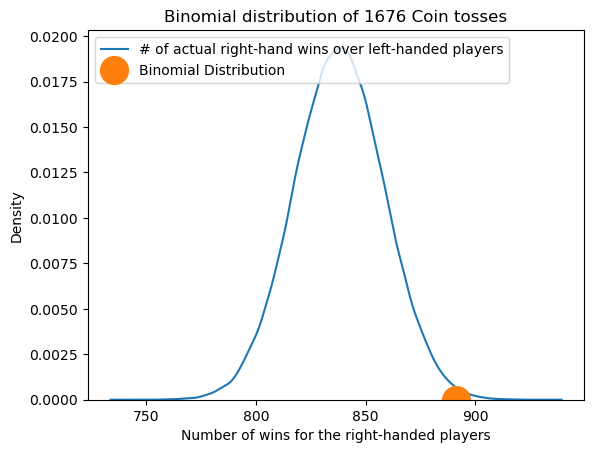

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.distplot(np.random.binomial(R + L, 0.5, 100000),np.arange(9300,9900,1))
plt.plot(R,0,'o', markersize = 20)
plt.title('Binomial distribution of ' + str(L+R) + ' Coin tosses')
plt.xlabel('Number of wins for the right-handed players')
plt.legend(['# of actual right-hand wins over left-handed players','Binomial Distribution'], loc = 2)
print(R)

# Is the winner's age different significantly between hard court and clay court?

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
# Filtering for hard and clay court matches
hard_court_ages = atp_combined_df[atp_combined_df['surface'] == 'Hard']['winner_age']
clay_court_ages = atp_combined_df[atp_combined_df['surface'] == 'Clay']['winner_age']
# Performing independent t-test
t_statistic, p_value = stats.ttest_ind(hard_court_ages, clay_court_ages)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
# Interpret results
alpha = 0.05 #significance level
if p_value < alpha:
    print("Reject the null hypothesis. There's a significant difference in winner's age between courts.")
else:
    print("Fail to reject the null hypothesis.There is no significant difference in winner's age between courts.")

T-statistic: -0.9017391454891465
P-value: 0.36722808135030427
Fail to reject the null hypothesis.There is no significant difference in winner's age between courts.


In [ ]:
# We want to compare the means of a numerical column 'winner_age' for 2 groups (hard and clay).
# we will use two-sample t-test method to compare the mean age of winners on hard and clay courts.

# Do right-handed players win more often than left-handed players?

In [50]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(atp_combined_df['winner_hand'], columns='count')

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test for handedness of winners:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}") 
#If the p-value is less than 0.05, there's a significant association between handedness and winning probability.

Chi-square test for handedness of winners:
Chi-square statistic: 0.0
p-value: 1.0


 # Is there a correlation between winner player height and number of aces?

In [52]:
# The Pearson correlation test examines the relationship between a player's height and the number of aces served.
# A positive correlation coefficient indicates that taller players tend to serve more aces. 
# If the p-value is less than 0.05, this relationship is significant.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Calculate correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(atp_combined_df['winner_ht'], atp_combined_df['w_ace'])

print("Correlation between winner's height and aces:")
print(f"Correlation coefficient: {corr_coef}")
print(f"p-value: {p_value}")


Correlation between winner's height and aces:
Correlation coefficient: 0.4059381885830049
p-value: 1.6570993153351097e-288


# Do players from certain countries (ioc) have a higher win rate on specific surfaces?

In [87]:
# Calculate win rates for each country (ioc) on each surface
win_rates = atp_combined_df.groupby(['winner_ioc', 'surface']).size().unstack(fill_value=0)
win_rates = win_rates.div(win_rates.sum(axis=1), axis=0)

# Perform one-way ANOVA for win rates on different surfaces
surfaces = ['Hard', 'Clay', 'Grass']
surface_rates = [win_rates[surface].dropna() for surface in surfaces]

f_statistic, p_value = stats.f_oneway(*surface_rates)

print("One-way ANOVA for IOC win rates on different surfaces:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

One-way ANOVA for IOC win rates on different surfaces:
F-statistic: 76.21237917973812
p-value: 3.248305491186151e-26


# Is there a correlation between a country's (IOC) average player height and their win rate on serve?

In [54]:
import scipy.stats as st
# Calculate average height and serve win rate for each IOC
ioc_stats = atp_combined_df.groupby('winner_ioc').agg({
    'winner_ht': 'mean',
    'w_1stWon': 'sum',
    'w_svpt': 'sum'
})
ioc_stats['serve_win_rate'] = ioc_stats['w_1stWon'] / ioc_stats['w_svpt']

# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(ioc_stats['winner_ht'], ioc_stats['serve_win_rate'])

print("Pearson correlation between average height and serve win rate by country:")
print(f"Correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

Pearson correlation between average height and serve win rate by country:
Correlation coefficient: 0.2399155151591337
p-value: 0.03320166321299519


In [ ]:
from scipy import stats

# Test hypothesis that higher-ranked players have a higher serve percentage

high_ranked = atp_combined_df[atp_combined_df['winner_rank'] <= 10]['w_serve_pct']
high_ranked = atp_combined_df[atp_combined_df['winner_rank'] <= 10]['w_serve_pct']
low_ranked = atp_combined_df[atp_combined_df['winner_rank'] > 10]['w_serve_pct']
t_stat, p_value = stats.ttest_ind(high_ranked, low_ranked)
print('T-statistic:', t_stat)
print('P-value:', p_value)

In [ ]:
# Import necessary libraries
import pandas as pd
from scipy import stats
import statsmodels.api as sm

# Hypothesis 1: Higher-ranked players have a higher serve percentage
high_ranked = atp_combined_df[atp_combined_df['winner_rank'] <= 10]['w_serve_pct']
low_ranked = atp_combined_df[atp_combined_df['winner_rank'] > 10]['w_serve_pct']
t_stat, p_value = stats.ttest_ind(high_ranked, low_ranked)
print('Hypothesis 1 - T-statistic:', t_stat)
print('Hypothesis 1 - P-value:', p_value)

# Hypothesis 2: Players with a higher serve percentage are more likely to win matches
df['match_success'] = 1  # Assuming all winners are successful
logit_model = sm.Logit(df['match_success'], atp_combined_df['w_serve_pct'])
result = logit_model.fit()
print('Hypothesis 2 - Logistic Regression Summary:')
print(result.summary())

# Hypothesis 3: The surface of the court affects the serve percentage
anova_result = stats.f_oneway(atp_combined_df[atp_combined_df['surface'] == 'Hard']['w_serve_pct'],
                              atp_combined_df[atp_combined_df['surface'] == 'Clay']['w_serve_pct'],
                              atp_combined_df[atp_combined_df['surface'] == 'Grass']['w_serve_pct'])
print('Hypothesis 3 - ANOVA F-statistic:', anova_result.statistic)
print('Hypothesis 3 - P-value:', anova_result.pvalue)


In [58]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('atp_matches_combined_cleaned.csv')

# Define functions for different types of tests

def perform_ttest(group1, group2, test_name):
    t_stat, p_value = stats.ttest_ind(group1, group2)
    print(f"\n{test_name}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

def perform_chi_square(data, column1, column2, test_name):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\n{test_name}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p_value}")

def perform_anova(groups, test_name):
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"\n{test_name}:")
    print(f"F-statistic: {f_statistic}")
    print(f"p-value: {p_value}")

def perform_correlation(x, y, test_name):
    corr, p_value = stats.pearsonr(x, y)
    print(f"\n{test_name}:")
    print(f"Correlation coefficient: {corr}")
    print(f"p-value: {p_value}")



# Define test cases

test_cases = [
    {
        'type': 'ttest',
        'name': 'Aces on different surfaces',
        'group1': df[df['surface'] == 'Hard']['w_ace'],
        'group2': df[df['surface'] == 'Clay']['w_ace']
    },
    {
        'type': 'chi_square',
        'name': 'Handedness vs Surface',
        'data': df,
        'column1': 'winner_hand',
        'column2': 'surface'
    },
    {
        'type': 'anova',
        'name': 'Win rates on different surfaces',
        'groups': [df[df['surface'] == surface]['w_1stWon'] / df[df['surface'] == surface]['w_svpt'] 
                   for surface in ['Hard', 'Clay', 'Grass']]
    },
    {
        'type': 'correlation',
        'name': 'Height vs Aces',
        'x': df['winner_ht'],
        'y': df['w_ace']
    }
]


# Execute all test cases
for case in test_cases:
    if case['type'] == 'ttest':
        perform_ttest(case['group1'], case['group2'], case['name'])
    elif case['type'] == 'chi_square':
        perform_chi_square(case['data'], case['column1'], case['column2'], case['name'])
    elif case['type'] == 'anova':
        perform_anova(case['groups'], case['name'])
    elif case['type'] == 'correlation':
        perform_correlation(case['x'], case['y'], case['name'])


Aces on different surfaces:
t-statistic: 25.182150615586938
p-value: 9.743286619117737e-134

Handedness vs Surface:
Chi-square statistic: 1.0004850369044507
p-value: 0.9097224332143969

Win rates on different surfaces:
F-statistic: 72.1026314918895
p-value: 9.790381376866208e-32

Height vs Aces:
Correlation coefficient: 0.4059381885830049
p-value: 1.6570993153351097e-288
